<center>
    
# Iris Classification

<center>

## Overview
<br>
<div style="text-align: justify">  
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.
</div>

In [1]:
# basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# maths
import math

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# dataset
from sklearn.datasets import load_iris

In [2]:
# custom command from scikit-learn
iris = load_iris()

x = iris.data
y = iris.target

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# setting up the dataset
iris_data = DataFrame(x, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = DataFrame(y, columns = ['Species'])

In [4]:
# defining the species in iris_target
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return 'Virginica'

iris_target['Species'] = iris_target['Species'].apply(flower)
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [5]:
# concatenating both iris_data and iris_target into iris
iris = pd.concat([iris_data, iris_target], axis = 1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


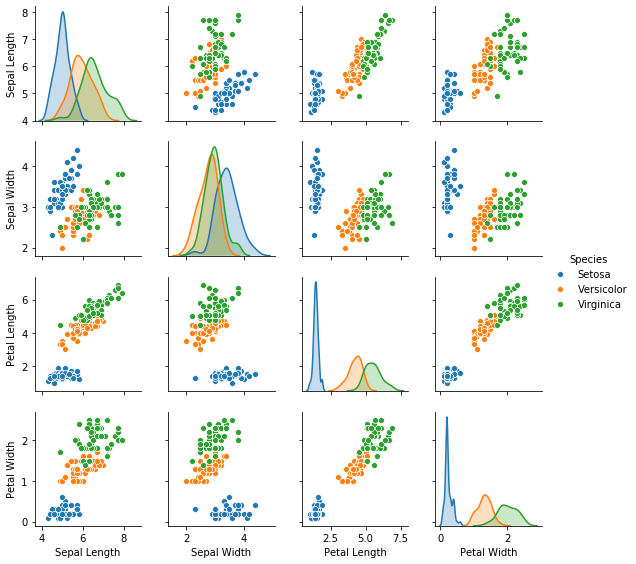

In [6]:
# plotting the iris dataset
sns.pairplot(iris, hue = 'Species', height = 2)

D:\Applications\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Applications\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


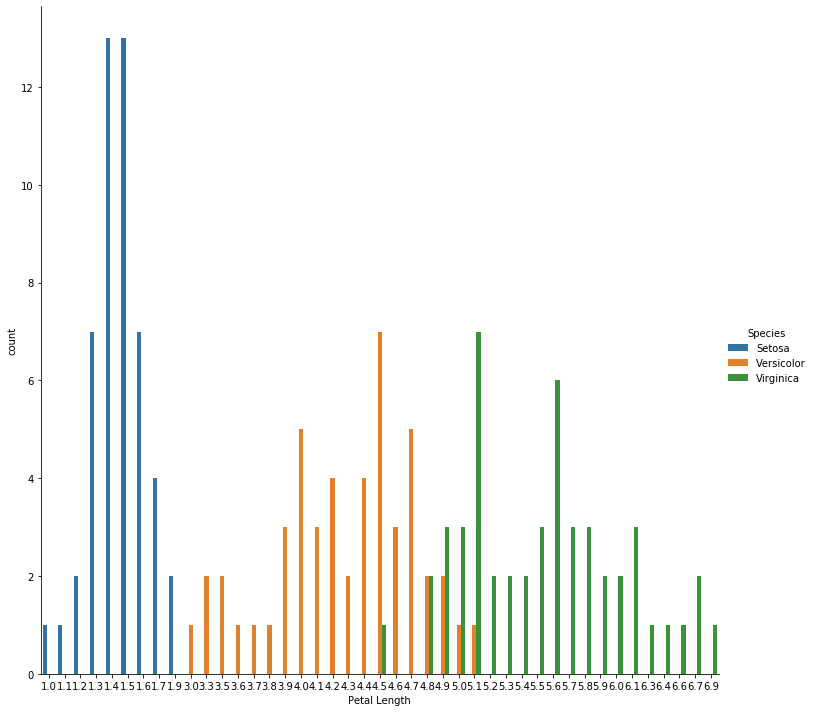

In [7]:
# factorplot of petal length given each species
sns.factorplot('Petal Length', data = iris, hue = 'Species', kind = 'count', size = 10, aspect = 1)

In [8]:
# splitting data to training and test data
logistic_reg = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 3)

# fitting the model
logistic_reg.fit(x_train, y_train)

D:\Applications\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Applications\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# predicting y
y_pred = logistic_reg.predict(x_test)

# getting model's accuracy
print("The model's accuracy is {:.3f}% using Logistic Regression".format(metrics.accuracy_score(y_test, y_pred) * 100))

The model's accuracy is 92.453% using Logistic Regression


In [10]:
# applying K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 7)

# fitting the model using K-Nearest Neighbors
knn.fit(x_train, y_train)

# predicting y
y_pred = knn.predict(x_test)

# getting model's accuracy
print("The model's accuracy is {:.3f}% using K-Nearest Neighbors".format(metrics.accuracy_score(y_test, y_pred) * 100))

The model's accuracy is 94.340% using K-Nearest Neighbors


Text(0, 0.5, "Model's Accuracy")

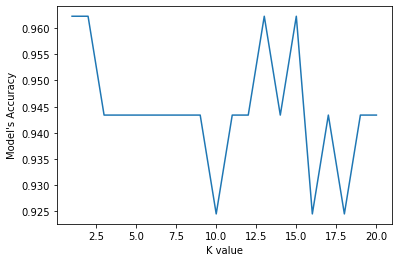

In [11]:
k_range = range(1, 21)

accuracy = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel("Model's Accuracy")

In [12]:
# using support vector machines
model = SVC()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 3)

In [13]:
# fitting the model
model.fit(x_train, y_train)

D:\Applications\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
# setting up the predicted value and expected value
predicted = model.predict(x_test)
expected = y_test 

print("The model's accuracy is {:.3f}% using Support Vector Machines".format(metrics.accuracy_score(expected, predicted) * 100))

The model's accuracy is 96.667% using Support Vector Machines


In [15]:
# setting up the data
iris = load_iris()
x = iris.data[:,:2]
y = iris.target

c = 1.0

# SVC with a linear Kernel
svc = svm.SVC(kernel = 'linear', C = c).fit(x, y)

# Gaussian Radial Basis Function
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C = c).fit(x, y)

# SVC with 3rd degree polynomial
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C = c).fit(x, y)

# SVC linear
lin_svc = svm.LinearSVC(C = c).fit(x, y)

D:\Applications\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Applications\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
# setting up the step size
h = 0.02

# setting up x minimum and x maximum
x_min = x[:, 0].min() - 1
x_max = x[:, 0].max() + 1

# setting up y minimum and y maximum
y_min = x[:, 1].min() - 1
y_max = x[:, 1].max() + 1

# meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# title
titles = [
    'SVC with Linear Kernel',
    'Linear SVC (linear kernel)',
    'SVC with RBF Kernel',
    'SVC with Polynomial (Degree 3) Kernel'
]

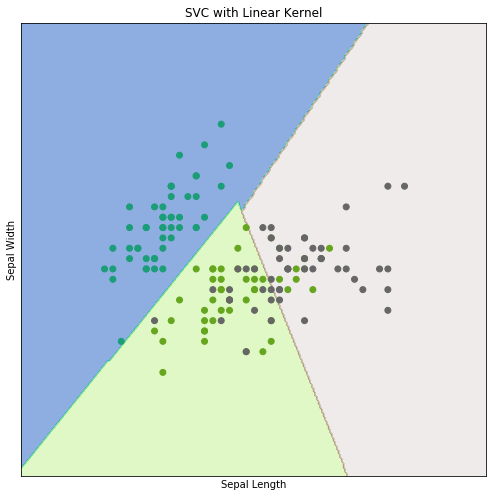

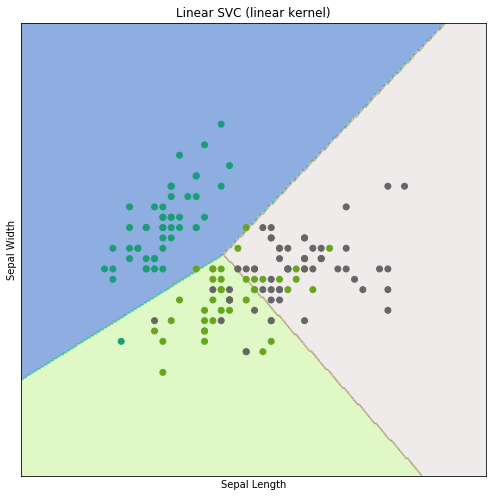

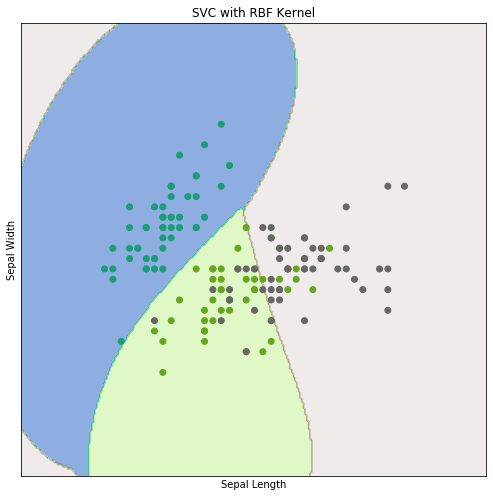

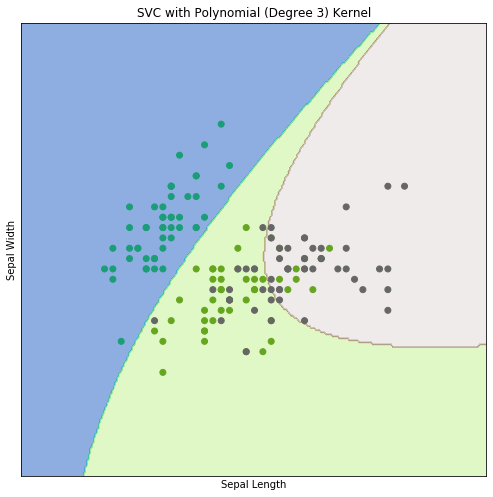

In [17]:
# plotting each SVM
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    plt.figure(figsize = (20, 20))
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, cmap = plt.cm.terrain, alpha = 0.5)
    plt.scatter(x[:, 0], x[:, 1], c = y, cmap = plt.cm.Dark2)
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [18]:
# setting up x and y
x = iris.data
y = iris.target

In [19]:
# using Gaussian Naive Bayes 
model = GaussianNB()

# splitting the data and fitting the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 3)
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
# setting up the predicted and expected value
predicted = model.predict(x_test)
expected = y_test

print("The model's accuracy is {:.3f}% using Gaussian Naive Bayes".format(metrics.accuracy_score(expected, predicted) * 100))

The model's accuracy is 98.333% using Gaussian Naive Bayes


In [21]:
def visualize_tree(model, boundaries = True, xlim = None, ylim = None):
    class_count = 3
    
    plot_colors = 'brg'
    markers = 'ovs'
    
    plot_res = 0.01
    plt.figure(figsize=(20,10))

    models = []
    for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):

        x = iris.data[:, pair] 
        y = iris.target
        
        models.append(model.fit(x, y))

        plt.subplot(2, 3, pair_index + 1)

        x_min = x[:, 0].min() - 0.5
        x_max = x[:, 0].max() + 0.5
        
        y_min = x[:, 1].min() - 0.5 
        y_max = x[:, 1].max() + 0.5
        
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_res),
            np.arange(y_min, y_max, plot_res) 
        )

        plt.tight_layout(
            h_pad = 0.5, 
            w_pad = 0.5, 
            pad = 4.0
        )


        Z = model.predict(np.c_[xx.ravel(), yy.ravel() ])
        Z = Z.reshape(xx.shape)

        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)


        plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
        plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])


        for i, color, marker in zip(range(class_count), plot_colors, markers):

            index = np.where(y == i)
        
            plt.scatter(
                x[index, 0], 
                x[index, 1], 
                c = color,
                marker = marker,
                label = iris.target_names[i],
                cmap = plt.cm.brg, 
                edgecolor = 'black',     
                s = 15
            )
        def plot_boundaries(i, xlim, ylim):
            if i < 0:
                return

            # Shorter variable name
            tree = model.tree_

            # Recursively go through nodes of tree to plot boundaries.
            if tree.feature[i] == 0:
                plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
                plot_boundaries(
                    tree.children_left[i],     
                    [xlim[0], tree.threshold[i]], 
                    ylim
                )
                plot_boundaries(
                    tree.children_right[i],
                    [tree.threshold[i], xlim[1]], 
                    ylim
                )

            elif tree.feature[i] == 1:
                plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
                plot_boundaries(
                    tree.children_left[i], 
                    xlim,
                    [ylim[0], tree.threshold[i]]
                )
                plot_boundaries(
                    tree.children_right[i], 
                    xlim,          
                    [tree.threshold[i], ylim[1]]
                )

    # Random Forest vs Single Tree
        if boundaries:
            plot_boundaries(0, plt.xlim(), plt.ylim())


    plt.suptitle('Decision Surface of a Decision Tree Using Paired Features', size = 24)
    plt.legend(loc = 'lower right',
               fontsize = 16,
               borderpad = 0.1, 
               handletextpad = 0.1 )
    plt.axis("tight")  

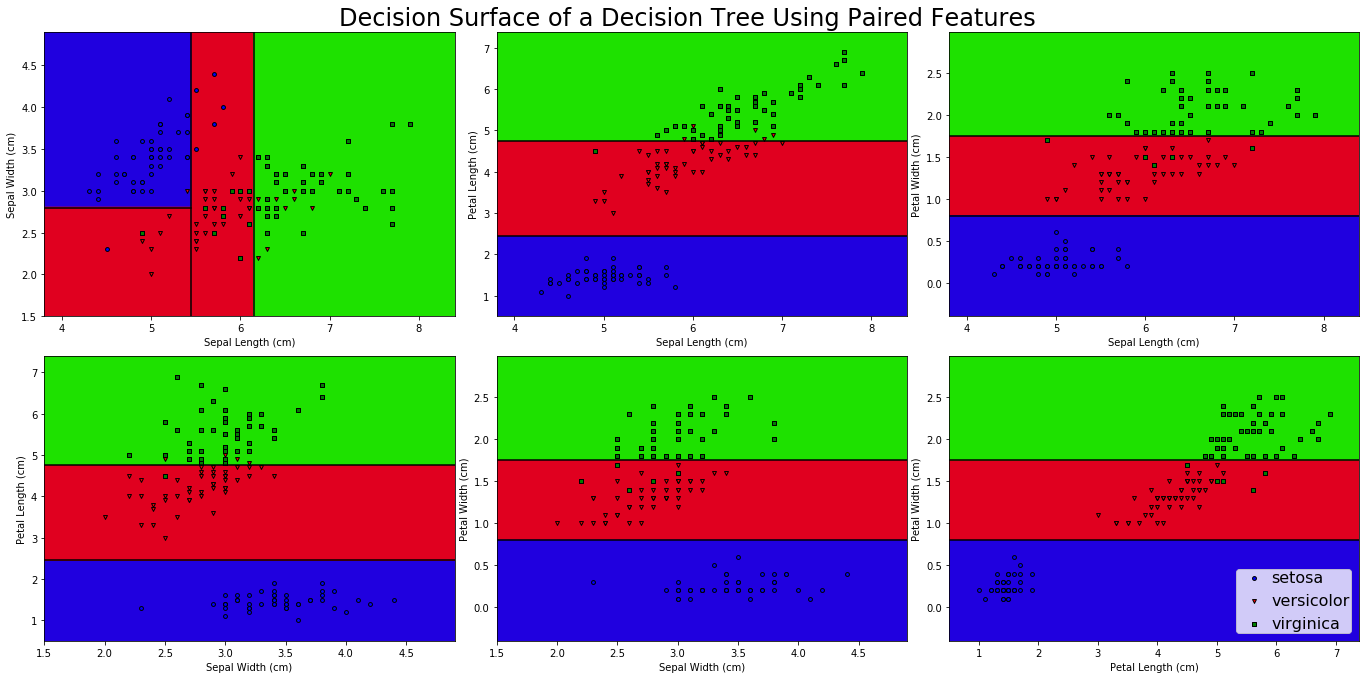

In [22]:
# using decision tree classifier
model = DecisionTreeClassifier(max_depth = 2, random_state = 0)

# visualizing boundaries
visualize_tree(model)

[Text(558.0, 498.3, 'X[2] <= 2.45\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(472.15384615384613, 407.70000000000005, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(643.8461538461538, 407.70000000000005, 'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(343.38461538461536, 317.1, 'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(171.69230769230768, 226.5, 'X[3] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(85.84615384615384, 135.89999999999998, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(257.53846153846155, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 226.5, 'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(429.23076923076917, 135.89999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(600.9230769230769, 135.89999999999998, 'X[2] <= 5.45\nentropy = 0.444\nsamples = 3\nvalue = [0, 2, 1]')

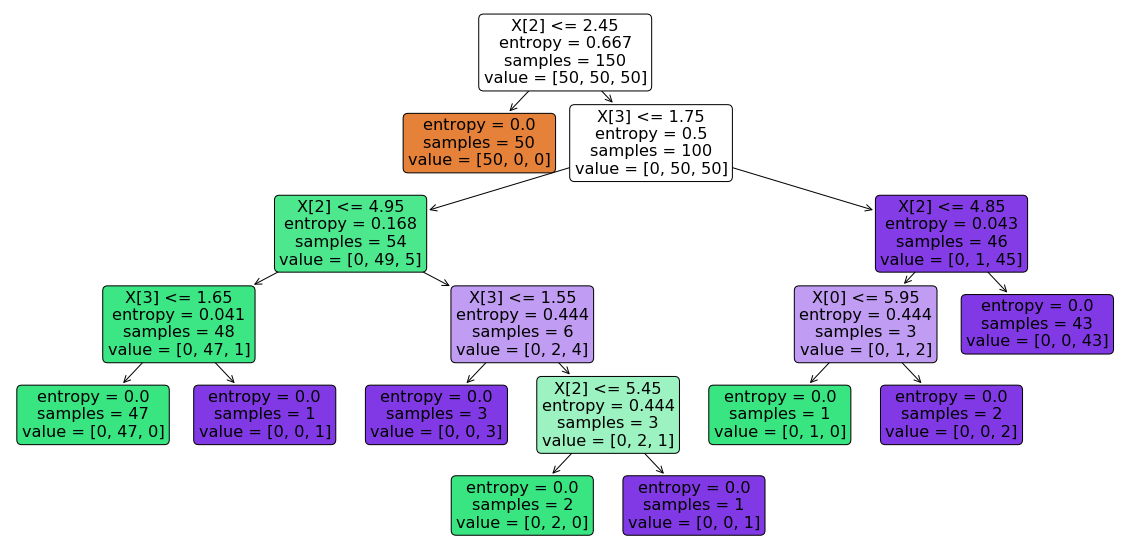

In [23]:
# setting up x and y
x = iris.data
y = iris.target

# using decision tree classifier
model = DecisionTreeClassifier()

# fitting the model
tree = model.fit(x, y)

# plotting
plt.figure(figsize = (20, 10))

plot_tree(tree, rounded = True, filled = True)

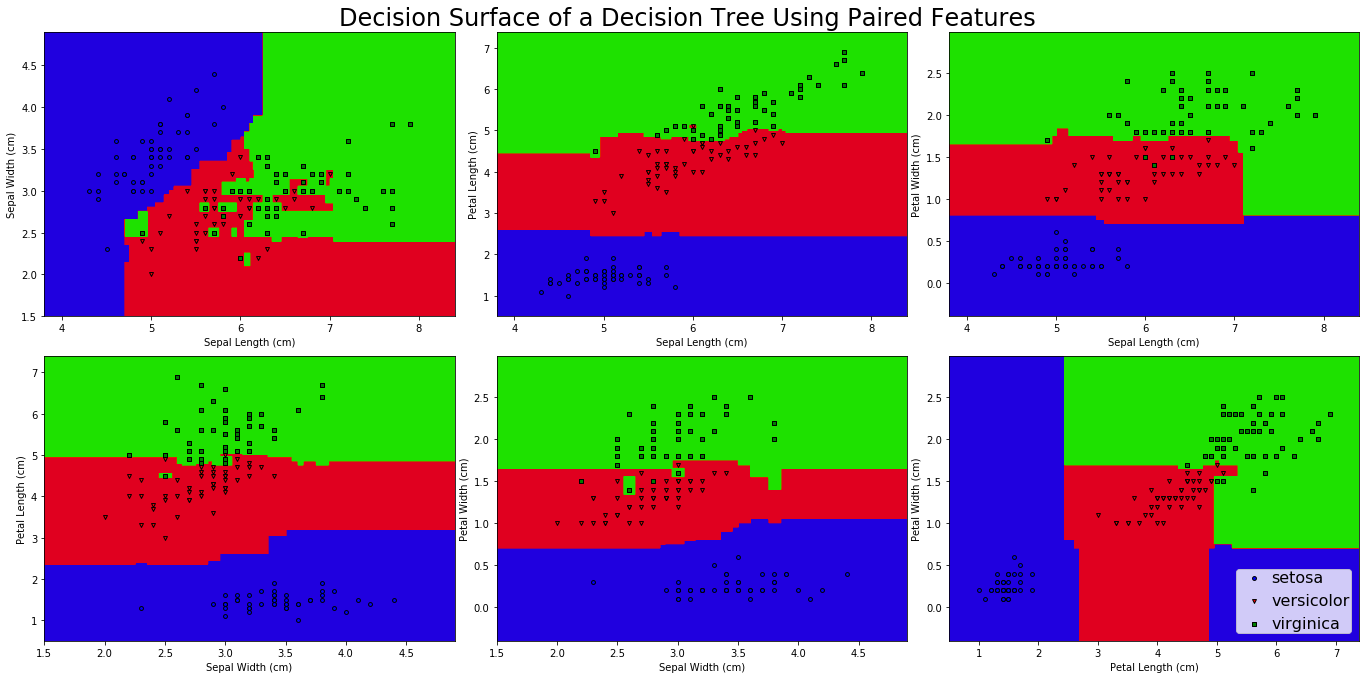

In [24]:
# using random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

# visualizing
visualize_tree(model, boundaries = False)

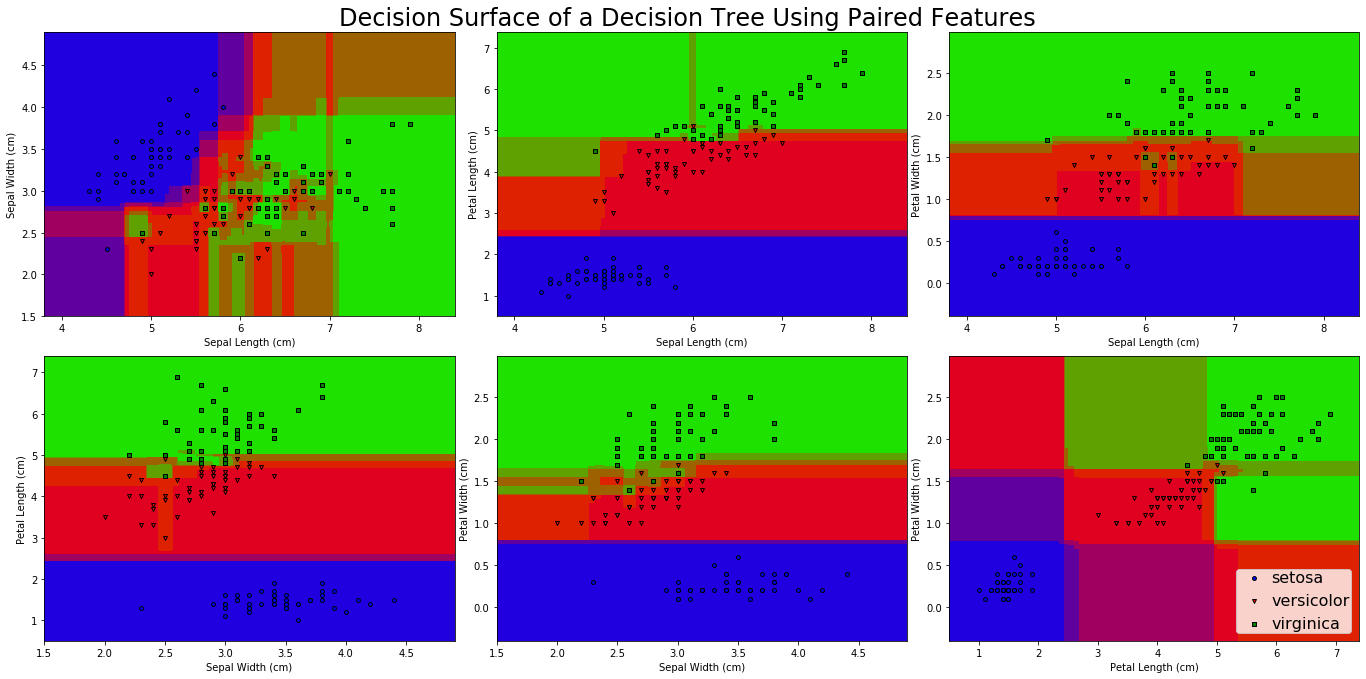

In [25]:
# using random forest regressor
model = RandomForestRegressor(100)

# visualizing
visualize_tree(model, boundaries = False)